In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

**Read all CSV files in a folder into a single dictionary**

In [243]:
def createDataDict(projectDirName = str):
       
    def cleanDataFrame(df = pd.DataFrame):
        df = df[df.Kind!='File']
        df = df.rename(columns={'CountClassCoupled':'cbo',
                                    'MaxInheritanceTree':'dit',
                                    'SumCyclomatic':'wmc',
                                    'CountClassDerived':'noc',
                                    'PercentLackOfCohesion':'lcom',
                                    'CountDeclMethodAll':'rfc',
                                    'Cyclomatic':'cyclomatic',})
        df.drop('CountLine',axis=1,inplace=True)
        df.drop('CountLineCode',axis=1,inplace=True)
        df.drop('Name',axis=1,inplace=True)
        df.drop('Kind',axis=1,inplace=True)
        return df

    def getBadSmellBinary(data = pd.DataFrame()):

        data['faultProne']=int(0);
        data['badSmells']=int(0);

        # applied to a row using lambda
        def detectBadSmell(row):

            #Long Method
            if row.cyclomatic > 5:
                row['faultProne'] = 1
                row['badSmells']+=1
            #Large Class
            if row.dit > 5 :
                row['faultProne'] = 1
                row['badSmells']+=1
            #Feature Envy    
            if row.cbo > 5 :
                row['faultProne'] = 1
                row['badSmells']+=1
            #Data Class
            if row.lcom > 2 :
                row['faultProne'] = 1
                row['badSmells']+=1
            #Large Class
            if row.wmc > 10 :
                row['faultProne'] = 1
                row['badSmells']+=1

            return row


        return data.apply(lambda x:detectBadSmell(x),axis=1);
    
    
    
    path = os.getcwd()+"/data/"+projectDirName+"/"
    directoryFiles = os.listdir(path)

    versions = [ int(string.split('.')[1]) for string in directoryFiles]
    versions.sort(reverse=False)

    dataDict = dict()
   
    for version in versions:
        version = str(version)
        for file in directoryFiles:
                if version in file:
                    dataDict[file] = pd.read_csv(path+file)
                    dataDict[file] = cleanDataFrame(pd.read_csv(path+file))
                    dataDict[file] = getBadSmellBinary(dataDict[file])
    
    return dataDict

---
**Implementation:**

---

In [233]:
## READ FILES INTO DICTIONARY ##

#mockito = createDataDict("Mockito")
#ant = createDataDict("Ant")
wildFly = createDataDict("WildFly")

wildFly1 = wildFly['widflyv8.0.csv']

In [239]:
s = wildFly1.groupby('cbo')['faultProne'].sum()

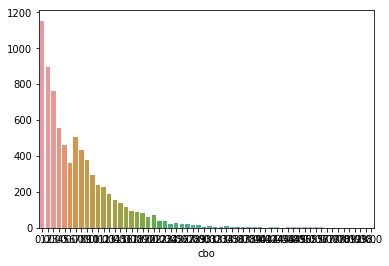

In [247]:
sns.barplot(x=s.index,y=s.values)